# Random Networks with iGraph

In [1]:
# Load relevant libraries
# Extensive documentation for iGraph here: http://igraph.org/r/doc/
suppressMessages(library(igraph))

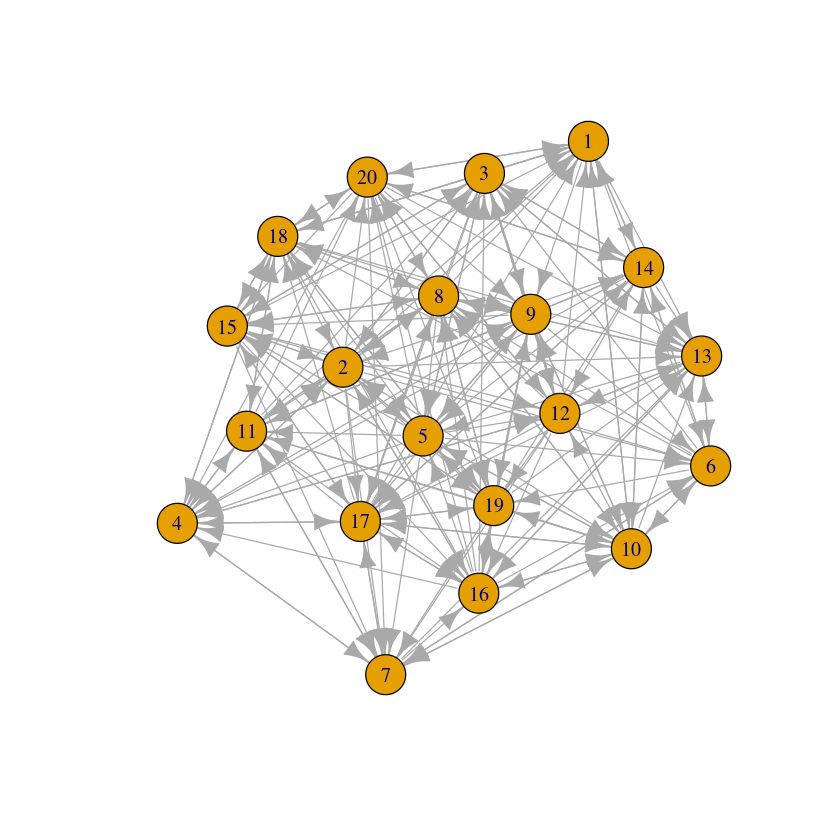

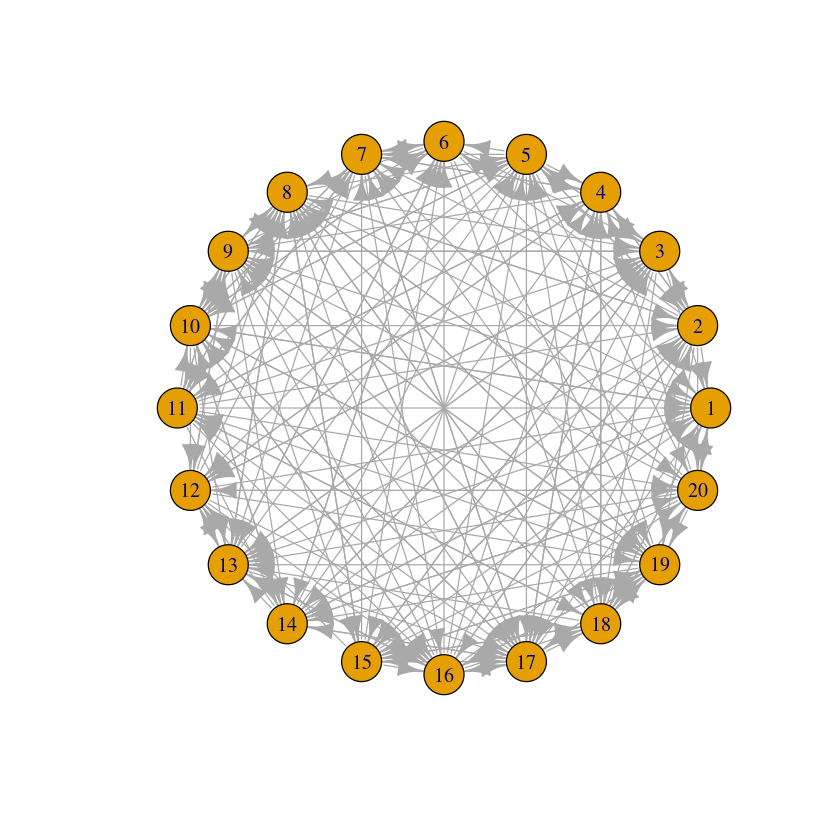

In [2]:
#igraph has a function for generating random networks of varying size and connectance (i.e. density). 
graph.random.gnp<-erdos.renyi.game(n=20,p.or.m=.5,type="gnp",directed=T)
plot.igraph(graph.random.gnp)
 
# We can also change the layout of the graph, here we will plot the nodes in a circle
plot.igraph(graph.random.gnp,layout=layout.circle)

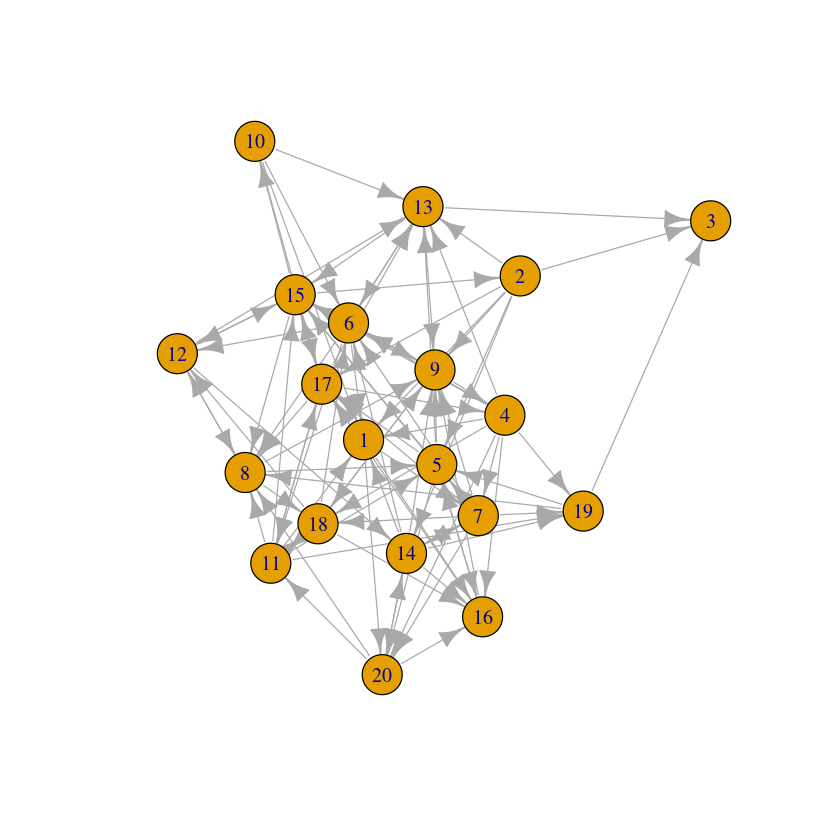

In [3]:
# The above random directed graph has 20 nodes ("n")
# type='gnp' tells the function to assign links with the probability "p" that we sepecify 
# In this case, any two nodes have a 50% probability of being connected.

# Can also set the number of links in the system to a value "m"
graph.random.gnm<-erdos.renyi.game(n=20,p.or.m=100,type="gnm",directed=T)
plot.igraph(graph.random.gnm)

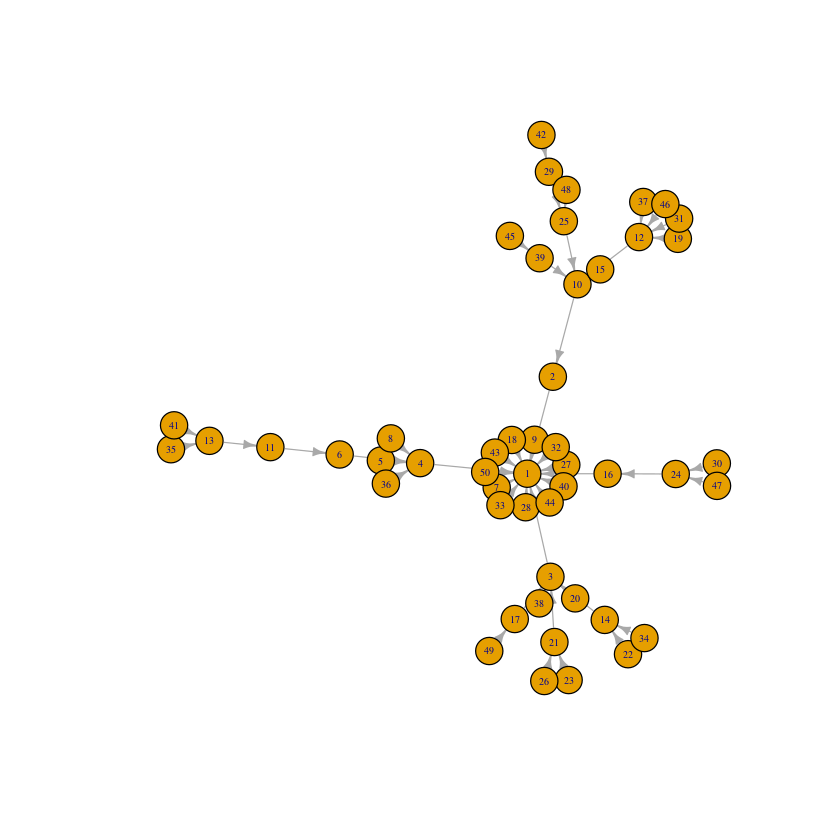

In [4]:
# Random graphs with preferential connection
# Because real world graphs tend to be scale-free, we may prefer to 
# generate random graphs with similar properties

# In igraph we can use the barabasi.game() function:
# Args: Number of nodes, power paratmer of preferential attachment function
graph.barabasi.1<-barabasi.game(n=50,power=1)

plot.igraph(graph.barabasi.1,
layout=layout.fruchterman.reingold,
vertex.size=10,         # sets size of the vertex, default is 15
vertex.label.cex=.5,    # size of the vertex label
edge.arrow.size=.5        # sets size of the arrow at the end of the edge
)

# Relative to Erdos-Renyi random netowrks, we observe the emergence of hub nodes


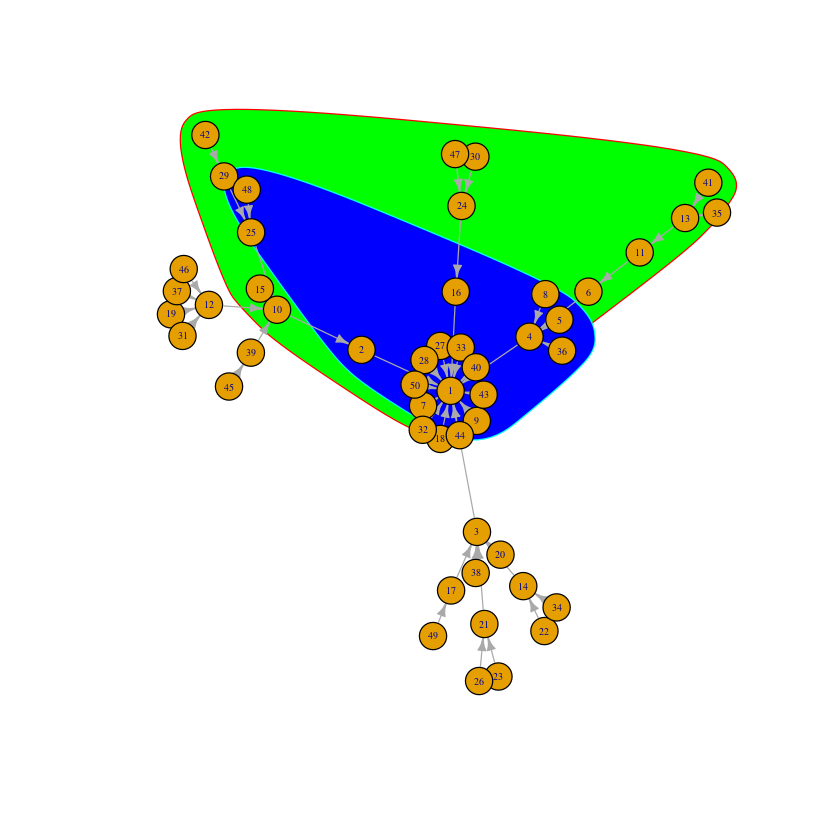

In [5]:
# Side Note: You can highlight regions of a graph manually by specifying 
# lists of nodes and colors
plot.igraph(graph.barabasi.1,
layout=layout.fruchterman.reingold,
vertex.size=10,
vertex.label.cex=.5,
edge.arrow.size=.5,
mark.groups=list(c(1,7,4,13,10,16,15,41,42,29),
c(2,48,5,36,43,33,9)), # draws polygon around nodes
mark.col=c("green","blue"))

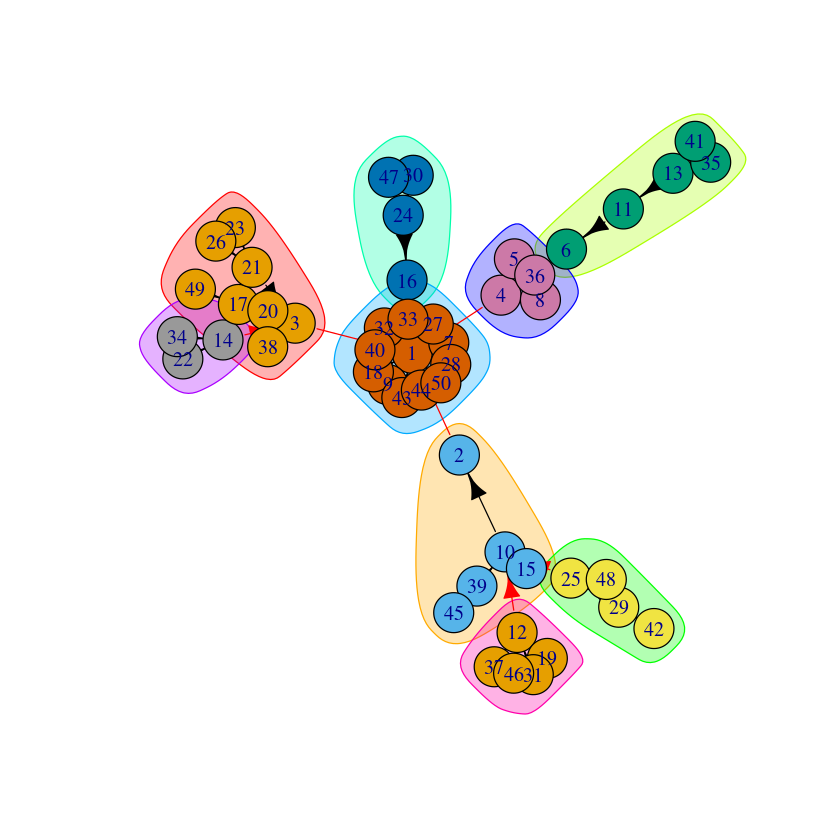

In [6]:
# Reminder of what communities looked like in this network
barabasi.community<-walktrap.community(graph.barabasi.1)
plot(barabasi.community, graph.barabasi.1)

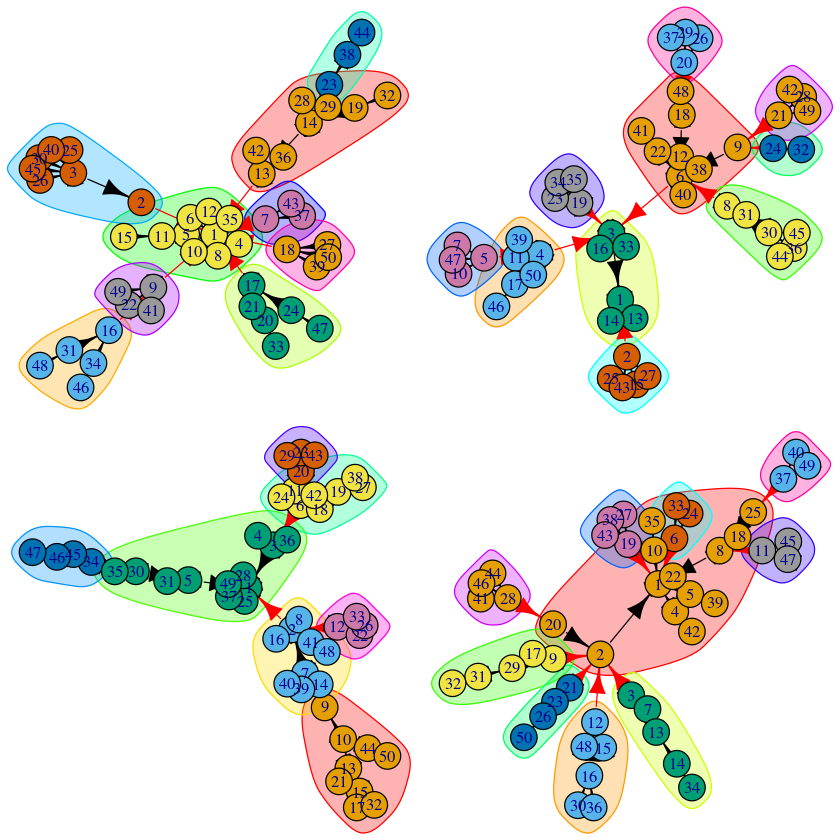

In [7]:
# Now we will play around with the "power" argument to see how that impacts the graphs.
# We will generate 4 networks with preferential attachment at varying levels.
# A power of 1 corresponds to a linear probability of attachement w.r.t. node degree
barabasi.game.2<-barabasi.game(n=50,power=.75)
barabasi.game.3<-barabasi.game(n=50,power=.5)
barabasi.game.4<-barabasi.game(n=50,power=.25)
barabasi.game.5<-barabasi.game(n=50,power=0)
 
# These can be organized into a list for convenience.
barabasi.graphs<-list(barabasi.game.2,barabasi.game.3,barabasi.game.4,barabasi.game.5)
 
# Now lets use community detection, this time with the walktrap algorithm.
bg.community.list<-lapply(barabasi.graphs,walktrap.community)
bg.membership.list<-lapply(bg.community.list,membership)
 
txt<-c("a","b","c","d")    # vector for labeling the graphs
 
# Plot these four graphs in one window with:
par(mfrow=c(2,2),mar=c(.2,.2,.2,.2))
# The for loop here plots each graph in the list one by one into the window prepared by par.
for(i in 1:4){
plot(bg.community.list[[i]],barabasi.graphs[[i]])
}

In [8]:
deg.distr.2<-degree.distribution(barabasi.game.2,cumulative=T,mode="all")
power.2<-power.law.fit(degree(barabasi.game.2,v=V(barabasi.game.2),mode="all"))
deg.distr.3<-degree.distribution(barabasi.game.3,cumulative=T,mode="all")
power.3<-power.law.fit(degree(barabasi.game.3,v=V(barabasi.game.3),mode="all"))
deg.distr.4<-degree.distribution(barabasi.game.4,cumulative=T,mode="all")
power.4<-power.law.fit(degree(barabasi.game.4,v=V(barabasi.game.4),mode="all"))
deg.distr.5<-degree.distribution(barabasi.game.5,cumulative=T,mode="all")
power.5<-power.law.fit(degree(barabasi.game.5,v=V(barabasi.game.5),mode="all"))


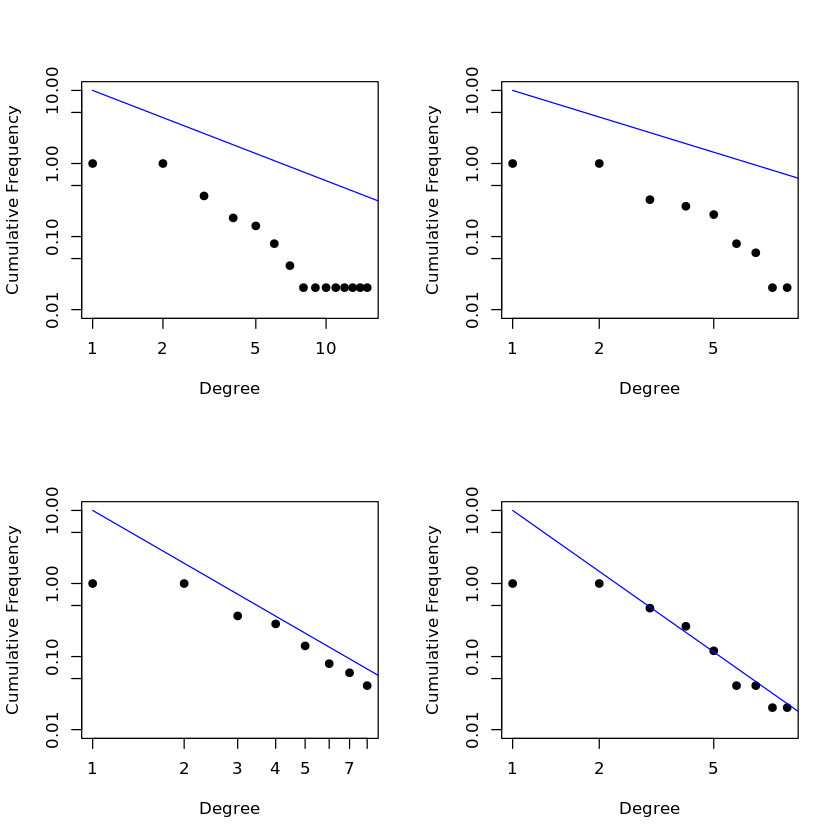

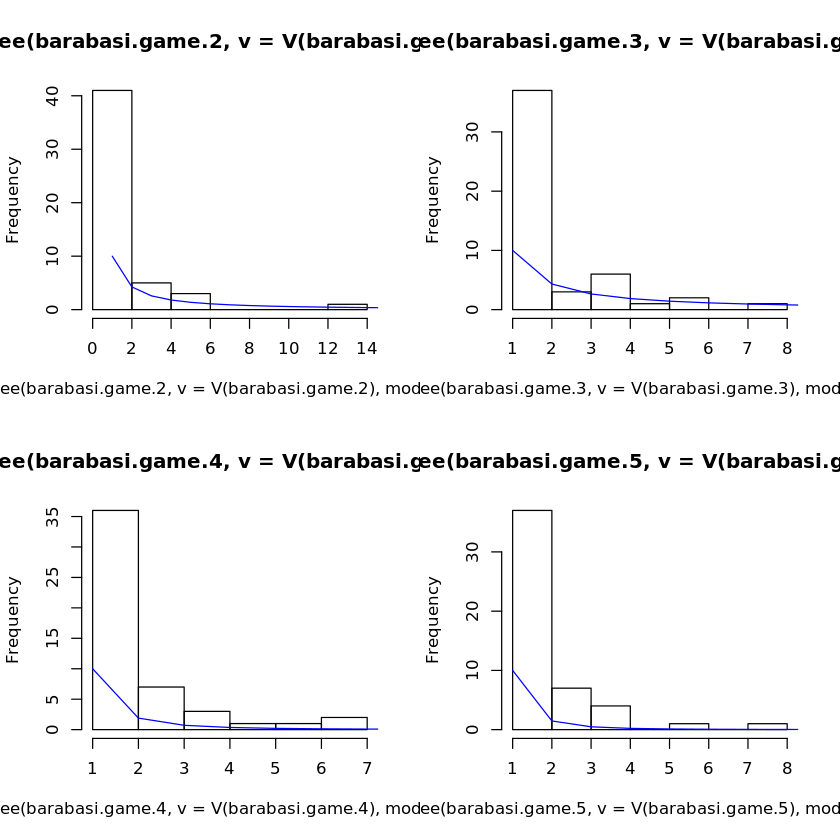

In [9]:
par(mfrow=c(2,2))
plot(deg.distr.2,log="xy",
ylim=c(.01,10),
bg="black",pch=21,
xlab="Degree",
ylab="Cumulative Frequency")
lines(1:20,10*(1:20)^((-power.2$alpha)+1),col="blue")

plot(deg.distr.3,log="xy",
ylim=c(.01,10),
bg="black",pch=21,
xlab="Degree",
ylab="Cumulative Frequency")
lines(1:20,10*(1:20)^((-power.3$alpha)+1),col="blue")

plot(deg.distr.4,log="xy",
ylim=c(.01,10),
bg="black",pch=21,
xlab="Degree",
ylab="Cumulative Frequency")
lines(1:20,10*(1:20)^((-power.4$alpha)+1),col="blue")

plot(deg.distr.5,log="xy",
ylim=c(.01,10),
bg="black",pch=21,
xlab="Degree",
ylab="Cumulative Frequency")
lines(1:20,10*(1:20)^((-power.5$alpha)+1),col="blue")

par(mfrow=c(2,2))
hist(degree(barabasi.game.2,v=V(barabasi.game.2),mode="all"))
lines(1:20,10*(1:20)^((-power.2$alpha)+1),col="blue")
hist(degree(barabasi.game.3,v=V(barabasi.game.3),mode="all"))
lines(1:20,10*(1:20)^((-power.3$alpha)+1),col="blue")
hist(degree(barabasi.game.4,v=V(barabasi.game.4),mode="all"))
lines(1:20,10*(1:20)^((-power.4$alpha)+1),col="blue")
hist(degree(barabasi.game.5,v=V(barabasi.game.5),mode="all"))
lines(1:20,10*(1:20)^((-power.5$alpha)+1),col="blue")


In [10]:
?permute

[1] TRUE

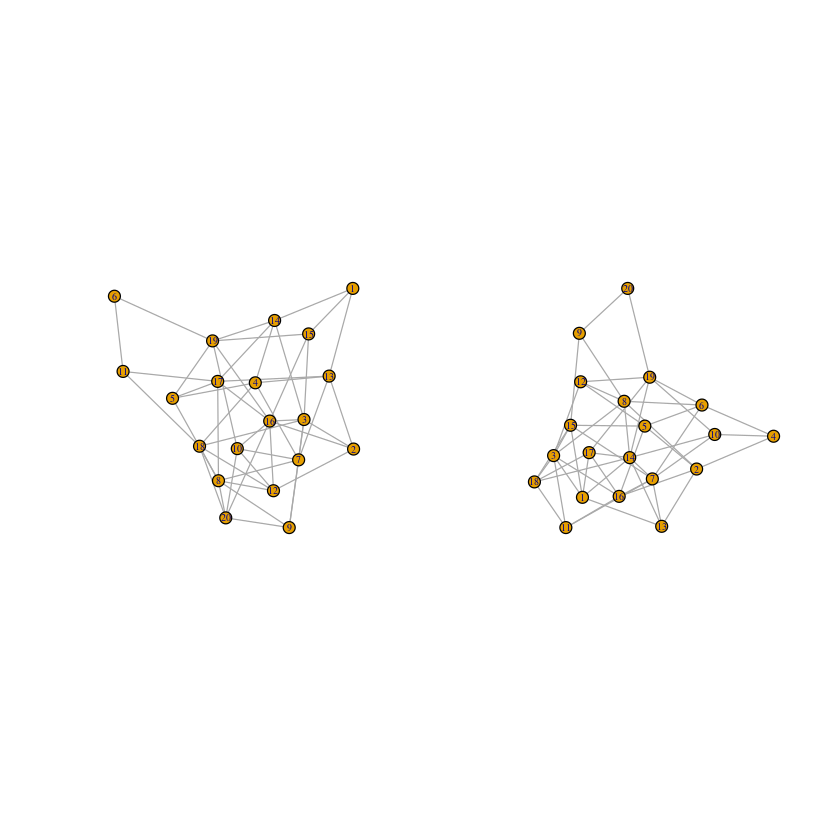

In [11]:
# Randomization for networks

# Permute vertices
g <- sample_gnm(20, 50)
g2 <- permute(g, sample(vcount(g))) # second parameter is a new vertex order
graph.isomorphic(g, g2) 

par(mfrow=c(1,2))
plot(g,layout=layout.fruchterman.reingold,
vertex.size=10,
vertex.label.cex=.5,
edge.arrow.size=.5)
plot(g2,layout=layout.fruchterman.reingold,
vertex.size=10,
vertex.label.cex=.5,
edge.arrow.size=.5)


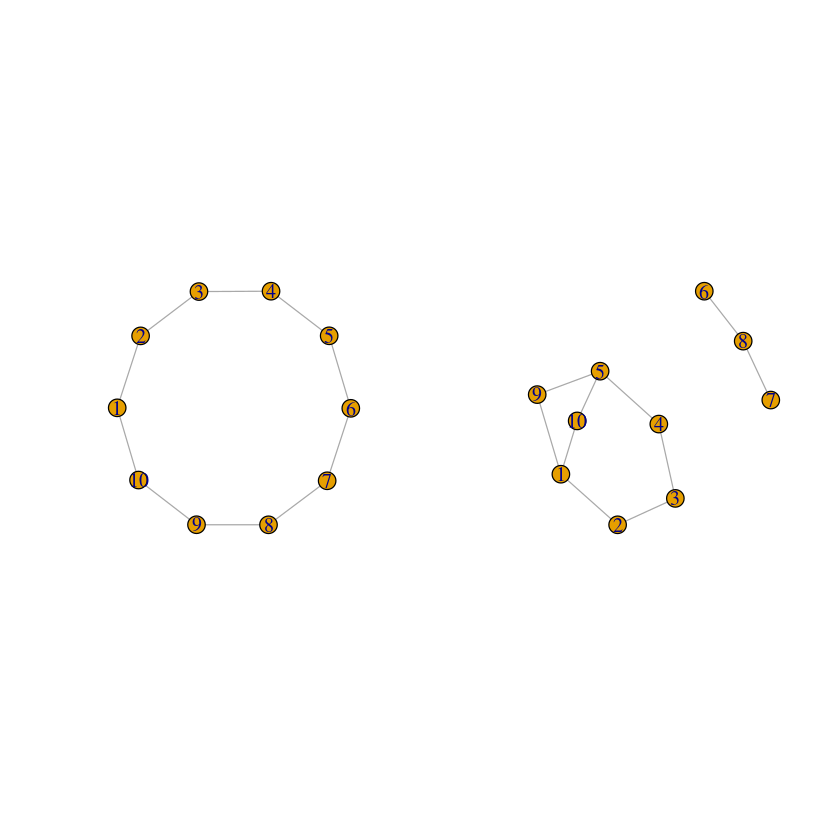

In [12]:
# Permute edges

# One strategy would be to shuffle the adjacency matrix
# Considerations would include whether edges are directed
# or the graph has self-loops

# Alternatively, iGraph provides the 'rewire' command instead
g <- make_ring(10)
g2 <- rewire(g, each_edge(p=0.3, loops=F))
par(mfrow=c(1,2))
plot(g)
plot(g2)

In [13]:
# Degree preserving permutation

# How would you change the above command to force all vertices to retain 
# the same number of edges? 
?rewire

In [14]:
?keeping_degseq

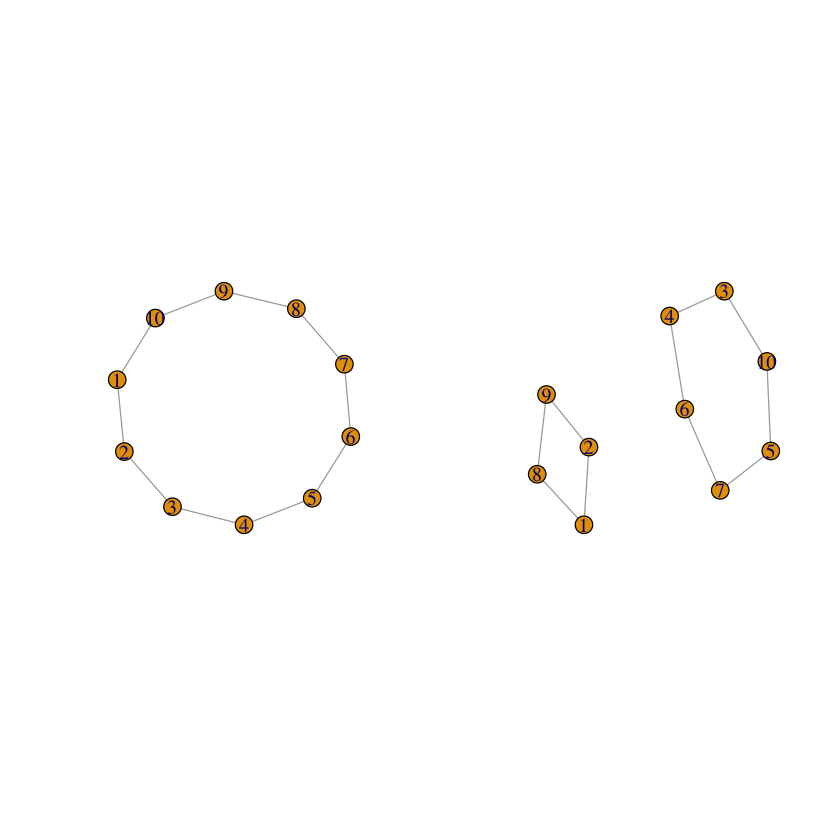

In [21]:
g3 <- rewire(g, keeping_degseq(loops=F, niter=5))
par(mfrow=c(1,2))
plot(g)
plot(g3)